In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

data_path = 'adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
data = pd.read_csv(data_path, names=column_names, sep = ",", skipinitialspace=True,  header=None)
data["wage_class"] = data["wage_class"].map({"<=50K": 0, ">50K": 1})
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [2]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

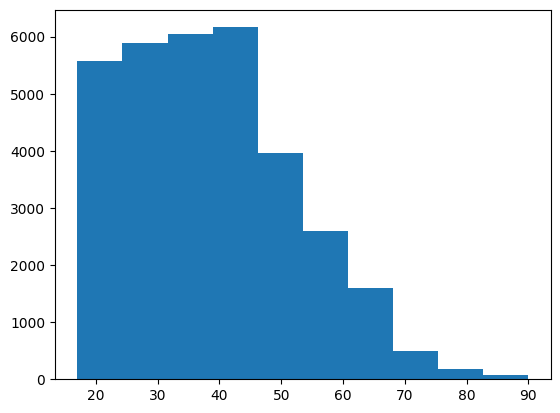

In [3]:
plt.hist(data.age)
plt.show()

In [4]:
data.age.min()

np.int64(17)

### Rozkład częstości wartości

In [5]:
data.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [6]:
data.groupby("workclass")["wage_class"].mean()

workclass
?                   0.104031
Federal-gov         0.386458
Local-gov           0.294792
Never-worked        0.000000
Private             0.218673
Self-emp-inc        0.557348
Self-emp-not-inc    0.284927
State-gov           0.271957
Without-pay         0.000000
Name: wage_class, dtype: float64

In [7]:
data["workclass"].replace({"Never-worked": "?", "Without-pay": "?"}).value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: count, dtype: int64

In [8]:
data["workclass"] = data["workclass"].replace({"Never-worked": "?", "Without-pay": "?"})

In [9]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


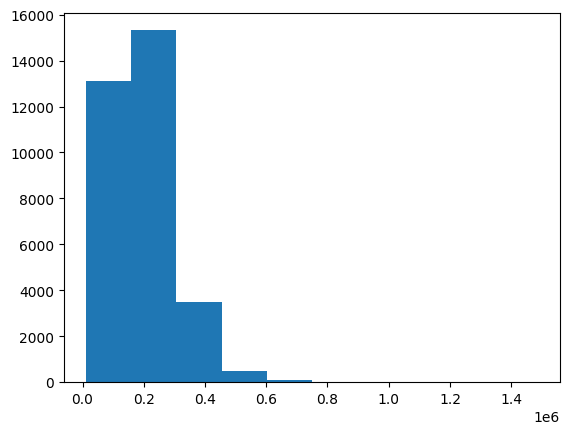

In [10]:
plt.hist(data.fnlwgt)
plt.show()

In [11]:
data = data.drop(["fnlwgt"], axis=1)

In [12]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [13]:
data.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [14]:
data.education_num.value_counts()

education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [15]:
pd.crosstab(data.education, data.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


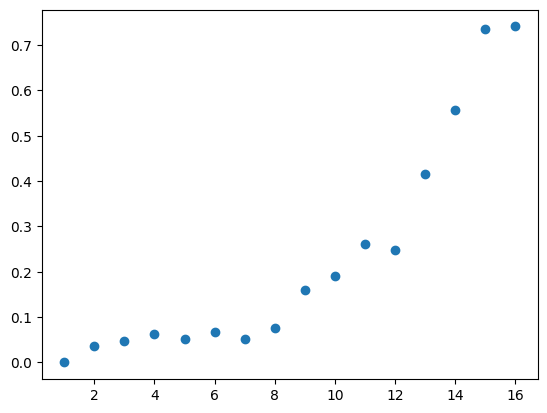

In [16]:
edu_wage = data.groupby("education_num")["wage_class"].mean()
plt.scatter(edu_wage.index, edu_wage)
plt.show()

In [17]:
data = data.drop(["education"], axis=1)

In [18]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### przeskakujemy: marital_status, occupation, relationship, race

In [19]:
data.sex

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
32556    Female
32557      Male
32558    Female
32559      Male
32560    Female
Name: sex, Length: 32561, dtype: object

In [20]:
data.sex.replace({"Male": 0, "Female": 1}).value_counts()

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_10656\3635114302.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.sex.replace({"Male": 0, "Female": 1}).value_counts()


sex
0    21790
1    10771
Name: count, dtype: int64

In [21]:
data.sex = data.sex.replace({"Male": 0, "Female": 1})

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_10656\2562988397.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.sex = data.sex.replace({"Male": 0, "Female": 1})


In [22]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


In [23]:
data.capital_gain

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_gain, Length: 32561, dtype: int64

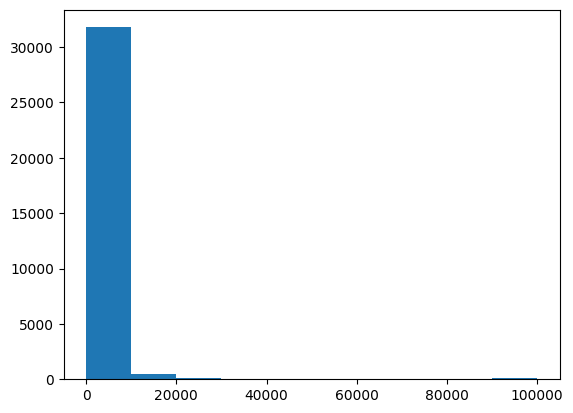

In [24]:
plt.hist(data.capital_gain)
plt.show()

In [25]:
pd.crosstab(data.capital_gain, data.sex)

sex,0,1
capital_gain,,
0,19701,10148
114,2,4
401,2,0
594,19,15
914,3,5
...,...,...
25236,6,5
27828,28,6
34095,3,2


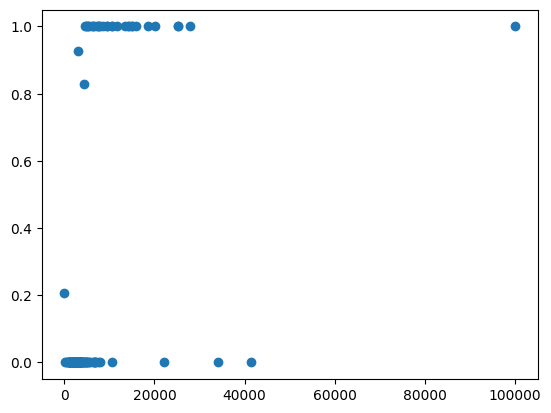

In [26]:
capital_gain = data.groupby("capital_gain")["wage_class"].mean()
plt.scatter(capital_gain.index, capital_gain)
plt.show()

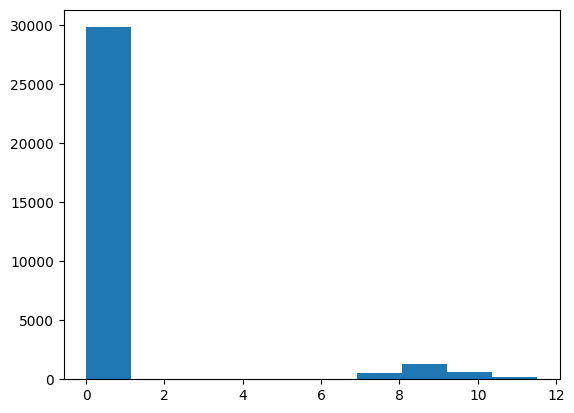

In [27]:
plt.hist(np.log1p(data.capital_gain))
plt.show()

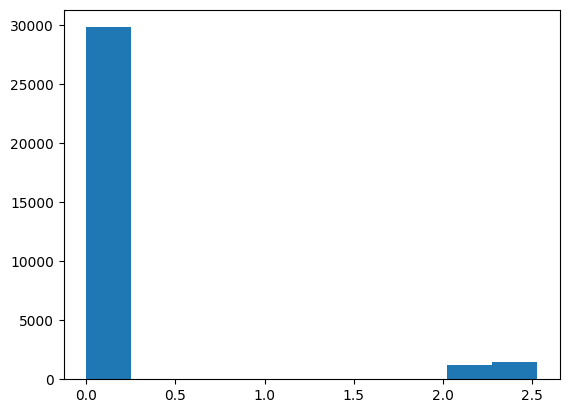

In [28]:
plt.hist(np.log1p(np.log1p(data.capital_gain)))
plt.show()

In [29]:
data.capital_gain = (data.capital_gain > 0).astype(int)
data.capital_loss = (data.capital_loss > 0).astype(int)

In [30]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


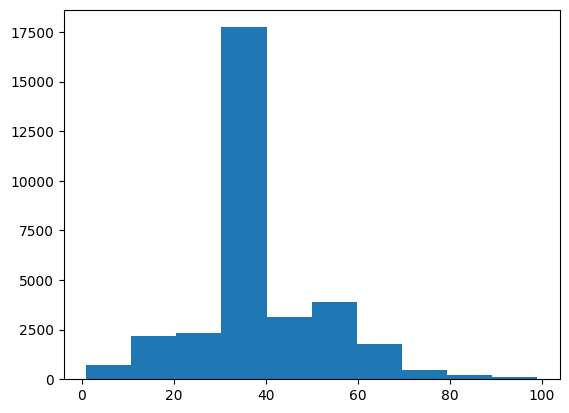

In [31]:
plt.hist(data.hours_per_week)
plt.show()

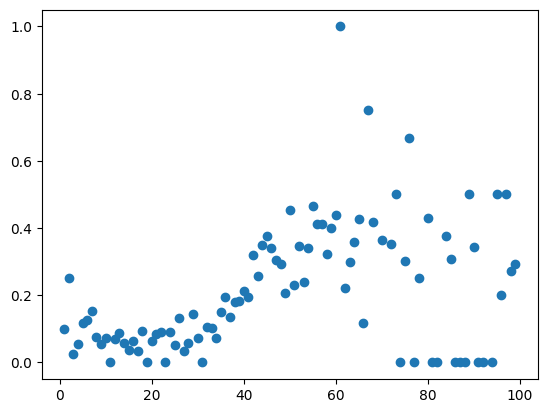

In [32]:
hours_per_week = data.groupby("hours_per_week")["wage_class"].mean()
plt.scatter(hours_per_week.index, hours_per_week)
plt.show()

In [33]:
data.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

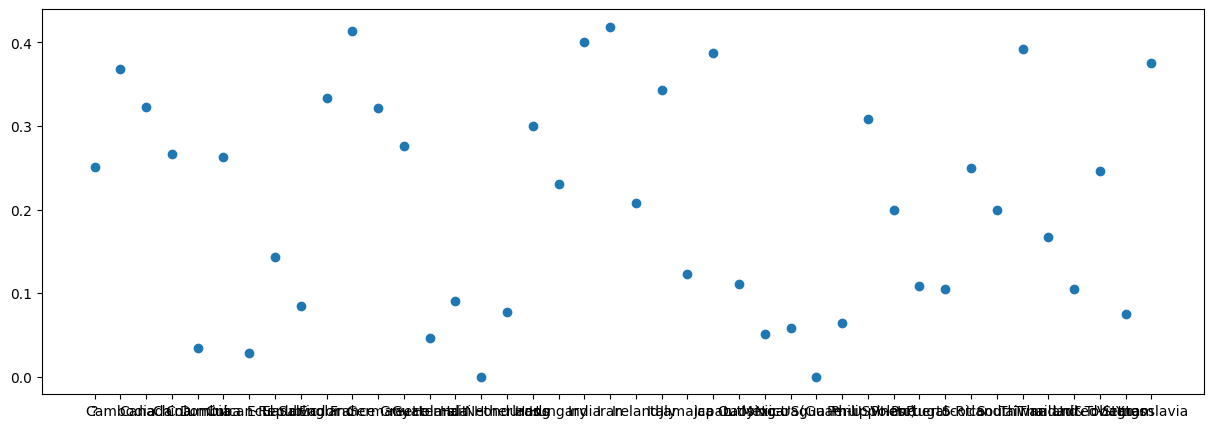

In [34]:
plt.figure(figsize=(15,5))
native_country = data.groupby("native_country")["wage_class"].mean()
plt.scatter(native_country.index, native_country)
plt.show()

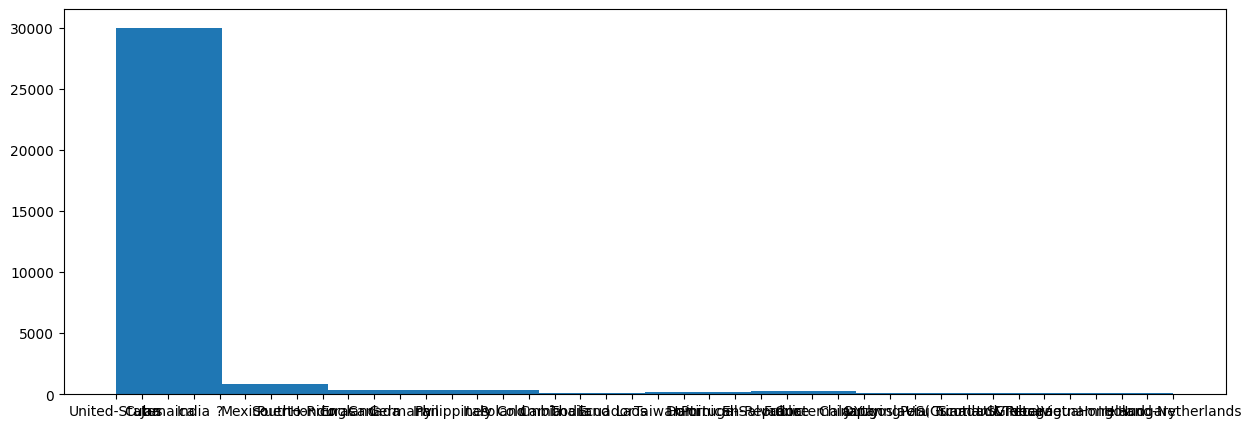

In [39]:
plt.figure(figsize=(15,5))
plt.hist(data.native_country)
plt.show()

In [40]:
data.native_country = (data.native_country == "United-States").astype(int)
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1,0,40,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,1,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,1,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,1,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,0,0


In [41]:
data.rename({"native_country": "us_native"}, axis=1, inplace=True)

In [42]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,us_native,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1,0,40,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,1,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,1,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,1,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,0,0
